<a href="https://colab.research.google.com/github/29nasa/Credit-Card-Customers-Clustering-/blob/main/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Objective ∇
Perform customer segmentation for credit card holders using clustering techniques to identify distinct user groups. These groups will help financial institutions design targeted marketing strategies, optimize credit offers, and improve customer engagement.



## Steps to Complete the Project

### Problem Framing
We'll segment the customers into groups based on their behavior (e.g., spending patterns, payment habits). Key questions:

What distinguishes high spenders, installment purchasers, or cash-advance users?
How can this segmentation improve marketing strategies?

### Load and Explore the Dataset
Read the dataset and perform basic exploratory data analysis (EDA).
Understand the distribution of numerical values, missing values, and correlations.

### Preprocessing
Handle missing values by imputing them with appropriate techniques (e.g., mean, median).
Normalize or standardize numerical features to make clustering effective.
Drop irrelevant or redundant features (e.g., CUST_ID).

### Clustering with K-Means
Use K-Means Clustering for segmentation.
Find the optimal number of clusters using the Elbow Method.
Visualize the results with Principal Component Analysis (PCA).

### Insights and Recommendations
Describe the characteristics of each cluster (e.g., "Cluster 1: High Spenders, Low Installments").
Provide actionable recommendations for marketing or product design.


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Import Training and Validation sets

from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))

# Read the CSV file into a DataFrame
data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
data.head()

Saving CC GENERAL.csv to CC GENERAL.csv


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Step 3: Explore the Dataset
print(data.head())
print(data.info())
print(data.describe())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

## Data Discovery and Visualization
### Key Goals During This Phase:
Understand the distribution of key variables like BALANCE,
* PURCHASES, and CASH_ADVANCE.
* Explore relationships between columns (e.g., PURCHASES vs. CREDIT_LIMIT).
* Identify outliers and anomalies in the data.
* Detect correlations between variables.

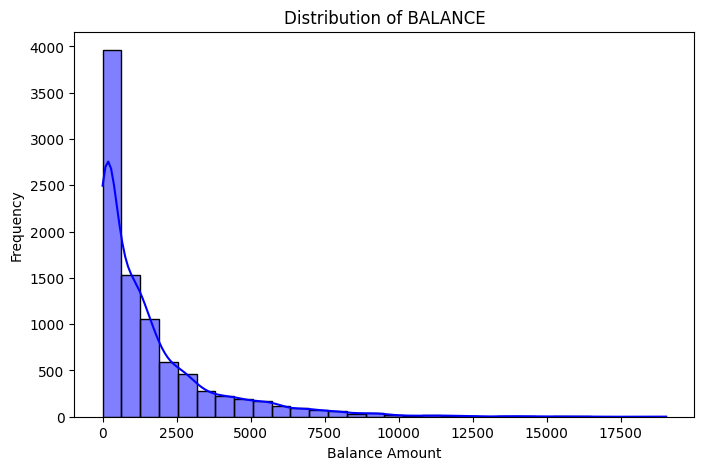

In [ ]:
# Plot distribution of BALANCE
plt.figure(figsize=(8, 5))
sns.histplot(data['BALANCE'], kde=True, bins=30, color='blue')
plt.title('Distribution of BALANCE')
plt.xlabel('Balance Amount')
plt.ylabel('Frequency')
plt.show()


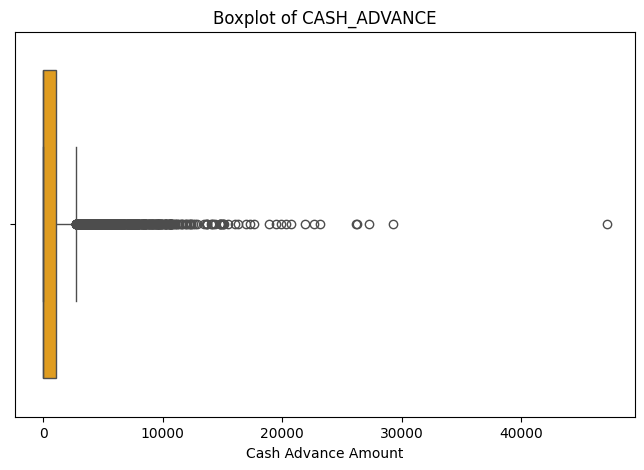

In [ ]:
# Boxplot for CASH_ADVANCE
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['CASH_ADVANCE'], color='orange')
plt.title('Boxplot of CASH_ADVANCE')
plt.xlabel('Cash Advance Amount')
plt.show()

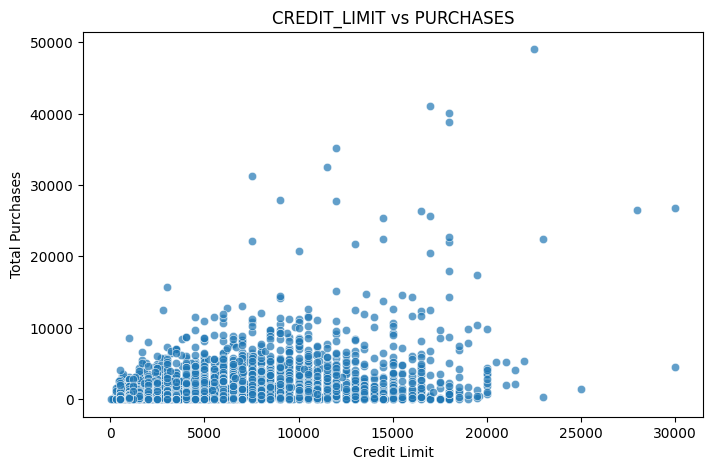

In [ ]:
# Scatter Plot: CREDIT_LIMIT vs PURCHASES
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['CREDIT_LIMIT'], y=data['PURCHASES'], alpha=0.7)
plt.title('CREDIT_LIMIT vs PURCHASES')
plt.xlabel('Credit Limit')
plt.ylabel('Total Purchases')
plt.show()

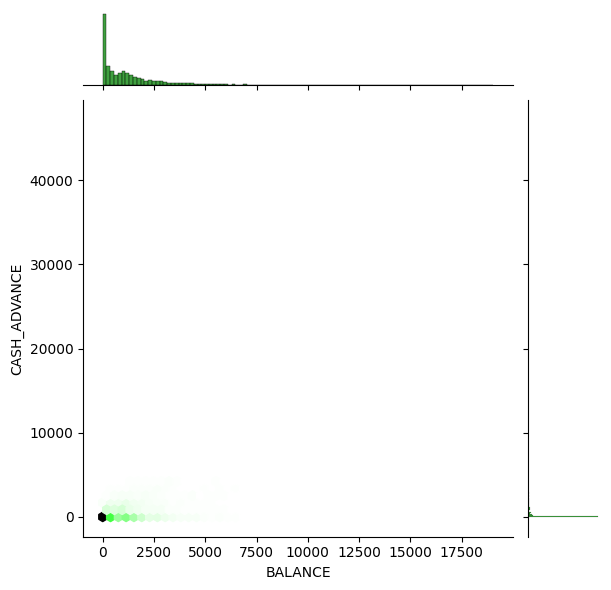

In [ ]:
# Jointplot: BALANCE vs CASH_ADVANCE
sns.jointplot(x='BALANCE', y='CASH_ADVANCE', data=data, kind='hex', color='green')
plt.show()

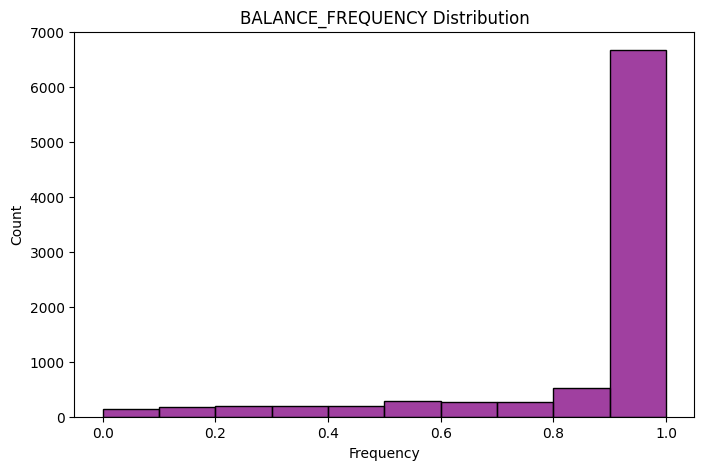

In [ ]:
# Frequency of BALANCE_FREQUENCY
plt.figure(figsize=(8, 5))
sns.histplot(data['BALANCE_FREQUENCY'], bins=10, kde=False, color='purple')
plt.title('BALANCE_FREQUENCY Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

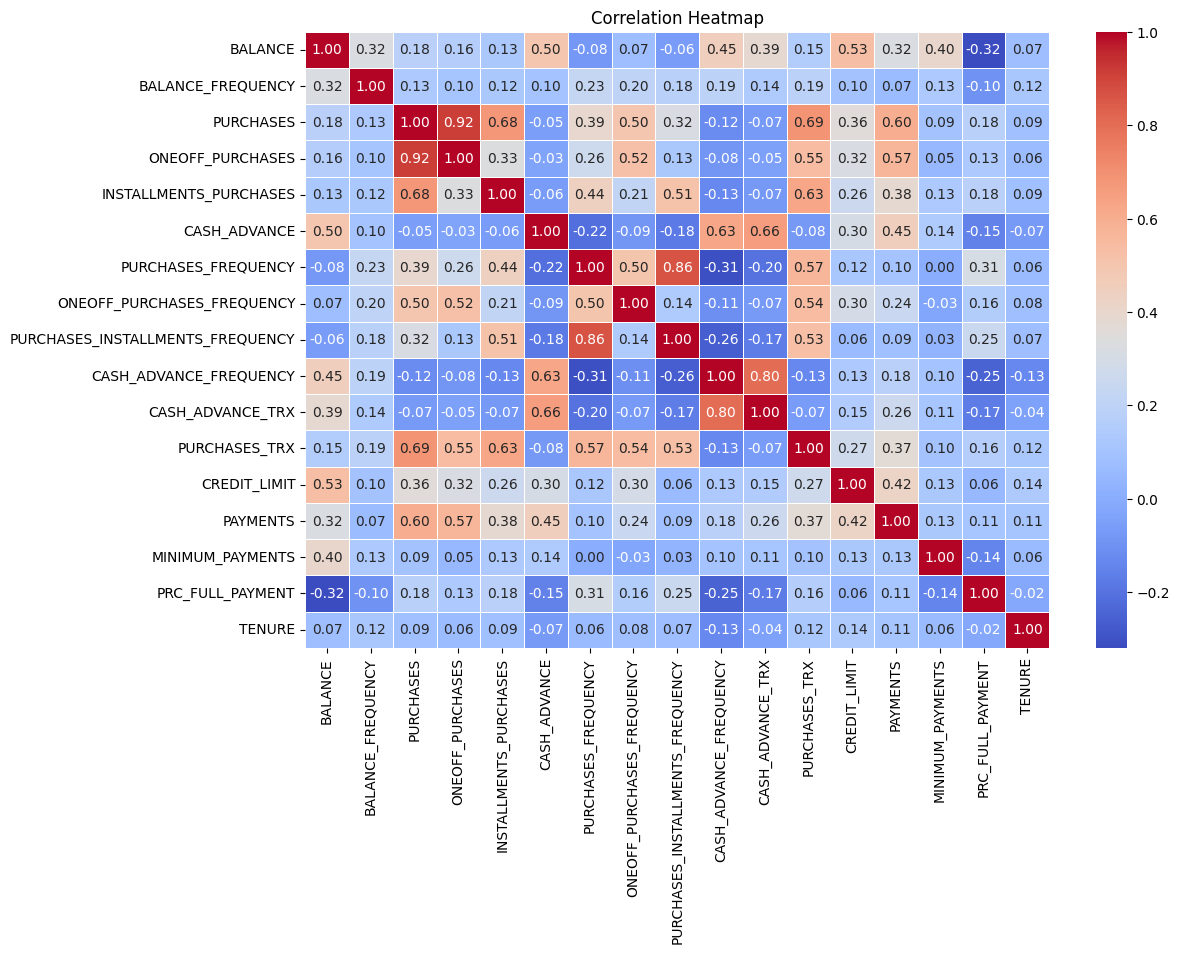

In [ ]:
# Drop non-numeric columns (like CUST_ID) for correlation computation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

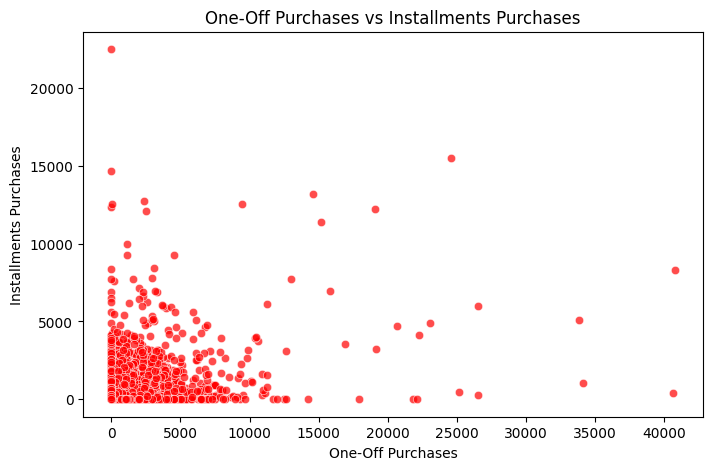

In [ ]:
# Customer Segmentation Hypotheses (Example Visualization)
# Scatter Plot: ONEOFF_PURCHASES vs INSTALLMENTS_PURCHASES
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['ONEOFF_PURCHASES'], y=data['INSTALLMENTS_PURCHASES'], alpha=0.7, color='red')
plt.title('One-Off Purchases vs Installments Purchases')
plt.xlabel('One-Off Purchases')
plt.ylabel('Installments Purchases')
plt.show()


## **Cleaning Missing Values**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
# Step 4: Handle Missing Values
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

# Step 5: Drop Irrelevant Features
data_cleaned = data.drop(['CUST_ID'], axis=1)

## **Normalize/Standardize Features**

Normalization scales numerical data to a common range (e.g., 0 to 1) to ensure that features with larger values (like BALANCE) don’t dominate over smaller ones (like PRCFULLPAYMENT) during clustering

In [ ]:
# Step 6: Normalize/Standardize Features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

## **Find Optimal Clusters (Elbow Method)**
This step groups customers into clusters by minimizing the distance between points within the same cluster and maximizing the distance between clusters. It’s an unsupervised learning method to identify customer segments.



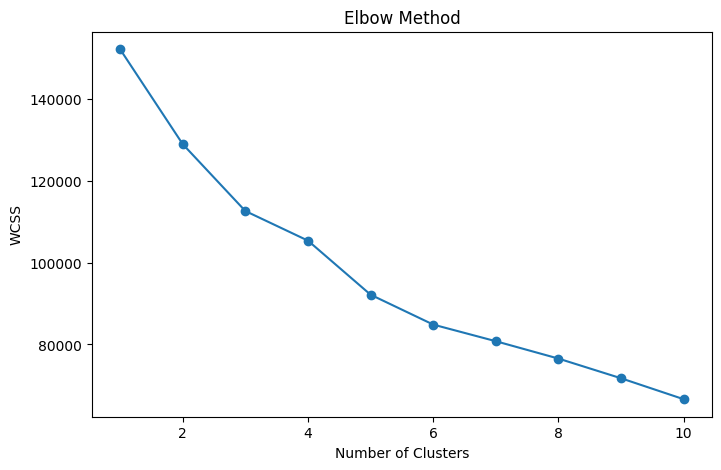

In [ ]:
# Step 7: Find Optimal Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## **Determine the Optimal Number of Clusters (Elbow Method)**
The elbow method helps choose the ideal number of clusters by plotting the within-cluster sum of squares (WCSS) for different k values and identifying the point where adding more clusters has diminishing returns.

In [ ]:
# Step 8: Apply K-Means Clustering
optimal_clusters = 4  # Set this based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

## **Fit the K-means Model**
This applies the K-means algorithm with the chosen number of clusters to group the data into distinct segments based on feature similarity.

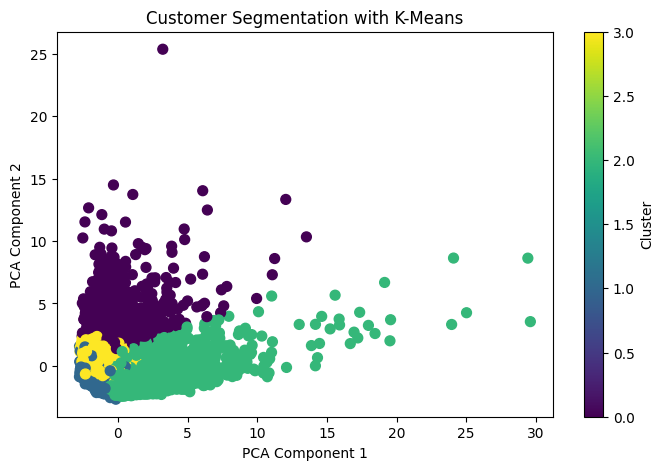

In [ ]:
# Step 9: Visualize Clusters with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segmentation with K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## **Analyze the Clusters**
After assigning cluster labels to the dataset, this step involves exploring the characteristics of each cluster (e.g., spending patterns, payment behavior) to derive actionable insights.

In [ ]:
# Step 10: Analyze Clusters
# Select only numeric columns for aggregation
numeric_data = data.select_dtypes(include=[np.number])

# Group by 'Cluster' and compute the mean for numeric columns
cluster_summary = numeric_data.groupby('Cluster').mean()

print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5023.958508           0.967107   721.184928        453.485000   
1         109.464707           0.412883   351.589913        191.487250   
2        1253.422099           0.974766  2181.418772       1241.370362   
3        1500.348531           0.966640   282.216074        209.226223   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    267.804742   5075.737329             0.329511   
1                    160.571811    299.684391             0.320703   
2                    940.311888    234.489319             0.928436   
3                     73.305481    789.088912             0.206247   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                    

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming `df_cluster_summary` is the DataFrame containing your cluster summary
# Replace this with your actual data if needed
data = {
    "BALANCE": [5023.96, 109.46, 1253.42, 1500.35],
    "BALANCE_FREQUENCY": [0.9671, 0.4129, 0.9748, 0.9666],
    "PURCHASES": [721.18, 351.59, 2181.42, 282.22],
    "ONEOFF_PURCHASES": [453.49, 191.49, 1241.37, 209.23],
    "INSTALLMENTS_PURCHASES": [267.80, 160.57, 940.31, 73.31],
    "CASH_ADVANCE": [5075.74, 299.68, 234.49, 789.09],
    "PURCHASES_FREQUENCY": [0.3295, 0.3207, 0.9284, 0.2062],
    "ONEOFF_PURCHASES_FREQUENCY": [0.1618, 0.0728, 0.3901, 0.0979],
    "PURCHASES_INSTALLMENTS_FREQUENCY": [0.2203, 0.2350, 0.7481, 0.1081],
    "CASH_ADVANCE_FREQUENCY": [0.5101, 0.0352, 0.0417, 0.1579],
    "CASH_ADVANCE_TRX": [15.83, 0.73, 0.81, 3.00],
    "PURCHASES_TRX": [10.42, 4.81, 32.72, 3.66],
    "CREDIT_LIMIT": [8215.31, 3628.94, 5120.67, 3226.82],
    "PAYMENTS": [4176.81, 1036.11, 2147.98, 954.23],
    "MINIMUM_PAYMENTS": [2227.86, 252.93, 784.27, 816.13],
    "PRC_FULL_PAYMENT": [0.0400, 0.2531, 0.2829, 0.0229],
    "TENURE": [11.41, 11.22, 11.73, 11.49]
}

# Convert dictionary to DataFrame
df_cluster_summary = pd.DataFrame(data, index=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])

# Using tabulate to create a nicely formatted table
print(tabulate(df_cluster_summary, headers='keys', tablefmt='fancy_grid'))


╒═══════════╤═══════════╤═════════════════════╤═════════════╤════════════════════╤══════════════════════════╤════════════════╤═══════════════════════╤══════════════════════════════╤════════════════════════════════════╤══════════════════════════╤════════════════════╤═════════════════╤════════════════╤════════════╤════════════════════╤════════════════════╤══════════╕
│           │   BALANCE │   BALANCE_FREQUENCY │   PURCHASES │   ONEOFF_PURCHASES │   INSTALLMENTS_PURCHASES │   CASH_ADVANCE │   PURCHASES_FREQUENCY │   ONEOFF_PURCHASES_FREQUENCY │   PURCHASES_INSTALLMENTS_FREQUENCY │   CASH_ADVANCE_FREQUENCY │   CASH_ADVANCE_TRX │   PURCHASES_TRX │   CREDIT_LIMIT │   PAYMENTS │   MINIMUM_PAYMENTS │   PRC_FULL_PAYMENT │   TENURE │
╞═══════════╪═══════════╪═════════════════════╪═════════════╪════════════════════╪══════════════════════════╪════════════════╪═══════════════════════╪══════════════════════════════╪════════════════════════════════════╪══════════════════════════╪═══════════════════

# **Data Interpretation**

## **Cluster 0 (High Spenders, Frequent Cash Advances):**

* High Balance: Customers in this cluster have a relatively high balance of \$5023.
* High Cash Advance: A very high cash advance amount (\$5075.7), indicating these customers are frequently taking cash advances.
* Purchases: Moderate purchases (\$721.18) and frequent purchases (frequency ~0.33).
* High Credit Limit: These customers also have the highest credit limits (\$8215.31).
* Payment Patterns: They make higher payments (\$4176.81) and have a relatively low minimum payment requirement compared to other clusters (\$2227.86).

## Lending Decision:
This group may be considered high-risk but also high-value. They might be using credit for convenience but frequently relying on cash advances, which can be a sign of financial distress or just a preference. Credit limits could be maintained or increased, but stricter monitoring of cash advances and interest charges may be appropriate.

## **Cluster 1 (Low Credit Usage, Moderate Payments):**

* Low Balance: Customers here have a very low balance (\$109.46).
* Low Cash Advances: Minimal use of cash advances (\$299.68), indicating they are not reliant on borrowing cash.
* Low Credit Limit: Their credit limit is the lowest (\$3628.94).
* Payments and Minimum Payments: Payments are low (\$1036.11), and their minimum payment is modest compared to others (\$252.93).
* Full Payment: A higher proportion of these customers make full payments, as shown by a PRC Full Payment of 0.25.

### Lending Decision:
This group could be seen as low-risk, as they don't use their credit heavily and tend to make full payments. However, they could also be underutilizing their credit, which may not be a priority for the bank. Marketing campaigns offering incentives for more frequent use or for higher credit utilization could be targeted at this group.

## **Cluster 2 (Moderate Spenders, High Installments, Frequent Purchases):**

* Moderate Balance: Customers have a moderate balance of \$1253.42.
* High Installment Purchases: These customers are making significant purchases on installments (\$940.31), suggesting they prefer spreading out payments.
* Moderate Credit Limit: Their credit limit is in the middle range (\$5120.67).
* Frequent Purchases: Frequent purchases and higher transaction volumes.
* Payments: Payments are moderately high (\$2147.98), but still below Cluster 0.

### Lending Decision:
This cluster seems like a good middle ground – not too risky, but not low usage either. They are utilizing credit regularly, making installment purchases, and making consistent payments. They may be offered credit limit increases or targeted with promotional offers on balance transfer products, as they seem comfortable with installment payments.

## **Cluster 3 (Low Purchasers, Higher Cash Advances, Low Payments):**

* Low Purchases: They make relatively low purchases (\$282.22) and have a low frequency of transactions.
High Cash Advances: Moderate cash advance usage (\$789.09), indicating a possible reliance on borrowing for liquidity.
* Low Credit Limit: Their credit limit is also the lowest in the dataset (\$3226.81).
* Low Payments: Payments are low (\$954.23) compared to other clusters, and they have a relatively high minimum payment requirement (\$816.13).
* Low PRC Full Payment: A low proportion of these customers make full payments, which could indicate that they carry balances.

### Lending Decision:
Customers in this group may be at a higher risk, as they rely on cash advances and have a lower frequency of regular purchases. They may need financial assistance or advisory services, and banks could monitor their account activity more closely. This group might also benefit from debt management programs or tailored offers that encourage balance repayment.



# **Possible Business Decisions Based on Clusters**

## **Credit Limit Adjustments**
* **Cluster 0:** Could be offered credit limit increases, but with higher fees or interest for cash advances to mitigate risk.
* **Cluster 1:** Could have their credit limits increased with incentives to use more credit (e.g., reward programs).
* **Cluster 2:** May be a good target for higher credit limits and balance transfer promotions.
* **Cluster 3:** Could have their credit limit adjusted based on payment behavior and cash advance usage.

## **Risk Assessment:**

* **Cluster 0 and 3:** These clusters may need closer monitoring due to their behavior around cash advances and balance carrying. Cluster 0 is high-value but high-risk, while Cluster 3 may present an opportunity for risk mitigation through targeted interventions (e.g., financial education).
* **Cluster 1 and 2:** These clusters are lower-risk, with Cluster 1 being particularly safe. Cluster 2 shows some signs of regular credit usage, so they could be engaged with loyalty programs and incentives.

## **Marketing and Promotions:**

* **Cluster 0:** Target with high-interest product promotions (e.g., reward cards or cash-back offers) or tools to manage debt.
* **Cluster 1:** Offer low-interest credit products or incentives for increasing usage, perhaps through targeted offers for travel or dining purchases.
* **Cluster 2:** Market products that help with installment-based purchases or balance transfers, as these customers seem comfortable with regular payments.
* **Cluster 3:** Send personalized offers for debt consolidation, reduced rates on cash advances, or educational content on managing credit.


## **Customer Retention and Engagement:**

* **Cluster 1:** Engage through loyalty programs, rewards for usage, and low-fee products to increase card utilization.
* **Cluster 2:** Use product offerings like low-interest or 0% APR balance transfers to keep them engaged.
* **Cluster 3:** Provide financial guidance and assistance, while offering tools for improving credit scores and managing outstanding debt.